In [1]:
import pandas as pd
df=pd.read_csv('emails.csv')

In [2]:
df.shape

(5172, 3002)

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
#input data
x=df.drop(['Email No.','Prediction'],axis=1)

#output data
y=df['Prediction']

In [5]:
x.shape
set(x.dtypes)

{dtype('int64')}

In [6]:
import seaborn as sns

<Axes: xlabel='Prediction', ylabel='count'>

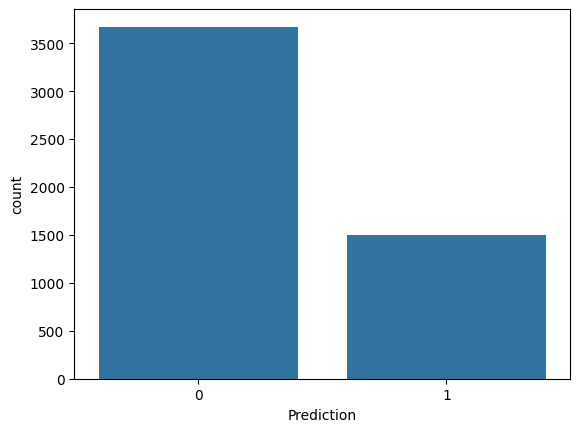

In [7]:
sns.countplot(x=y)


In [8]:
y.value_counts()

,count
Prediction,
0,3672
1,1500


In [9]:
#feature scaling

from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [13]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [14]:
#cross validation

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)

In [16]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [17]:
y_predict=knn.predict(x_test)

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report

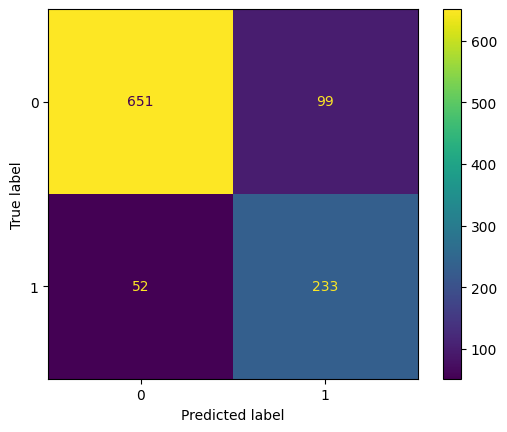

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [20]:
y_test.value_counts()

,count
Prediction,
0,750
1,285


In [22]:
accuracy_score(y_test,y_predict)

0.8541062801932368

In [23]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       750
           1       0.70      0.82      0.76       285

    accuracy                           0.85      1035
   macro avg       0.81      0.84      0.83      1035
weighted avg       0.86      0.85      0.86      1035



In [24]:
from sklearn.svm import SVC

svm=SVC(kernel='linear')

svm.fit(x_train,y_train)

y_pred=svm.predict(x_test)



In [27]:
accuracy_score(y_test,y_pred)

0.9439613526570049

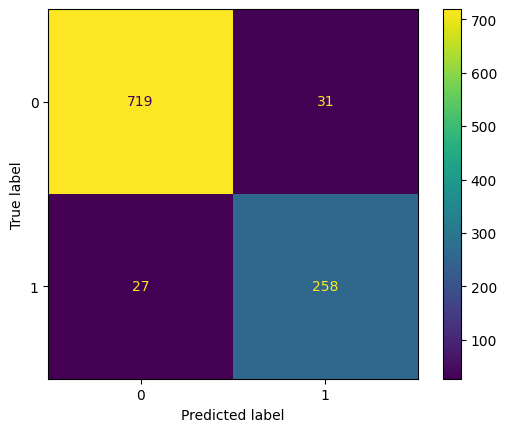

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [30]:
svm=SVC(kernel='rbf')

svm.fit(x_train,y_train)

y_pred=svm.predict(x_test)

In [31]:
svm=SVC(kernel='poly')

svm.fit(x_train,y_train)

y_pred=svm.predict(x_test)